Problem 2



In [59]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import mnist


### Prepare the data

In [60]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("training images shapes: ", x_train.shape)
print("testing images shapes: ", x_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targets shapes: ", y_test.shape)
#plt.imshow(x_train[0], cmap=plt.cm.gray_r, interpolation="nearest")
#print(x_train[0])
#plt.show()

training images shapes:  (60000, 28, 28)
testing images shapes:  (10000, 28, 28)
training targets shapes:  (60000,)
testing targets shapes:  (10000,)


In [61]:
# Creating new sets of even training and testing data
even_digits = [i for i in range(len(y_train)) if y_train[i] % 2 == 0]
even_x_train = x_train[even_digits]
even_y_train= y_train[even_digits]

even_test_digits = [i for i in range(len(y_test)) if y_test[i] % 2 == 0]
even_x_test = x_test[even_test_digits]
even_y_test= y_test[even_test_digits]

# Flatten 2D training arrays and create a DataFrame
even_mnist_df = pd.DataFrame({
    'Image': [img.flatten() for img in x_train[even_digits]],
    'Digit': y_train[even_digits]})

# Display the resulting DataFrame
print(even_mnist_df.head(10))

                                               Image  Digit
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      4
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      2
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      4
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      6
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      2
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      8
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      6
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      4
9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0


### attempting to pairplot

In [62]:
Label = ["Zero","One","Two","Three","Four","Five","Six","Seven", "Eight", "Nine"]
named_targets = []

for elm in even_mnist_df['Digit'].to_list():
    named_targets.append(Label[elm])
    
even_mnist_df['Label'] = named_targets

In [63]:
display(even_mnist_df)

,Image,Digit,Label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,Zero
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,Four
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,Two
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,Four
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,Six
...,...,...,...
29487,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,Eight
29488,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,Two
29489,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,Eight
29490,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,Six


C:\Users\melvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


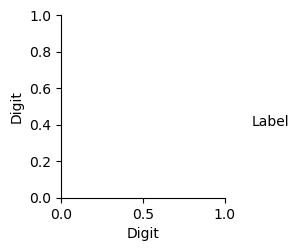

In [64]:
sns.pairplot(even_mnist_df, hue='Label')
plt.show()

### As can be seen from my attempt, pairplot is not effective in visualizing this data. I think this is because it contains too many features for each data point (28x28), and so it is not feasible to visualize all pairs of these features, and even if we could, it would be hard to interpret.

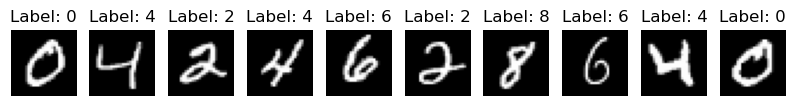

In [65]:

# Visualizing a few images instead:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(even_x_train[i], cmap='gray')
    plt.title(f"Label: {even_y_train[i]}")
    plt.axis('off')

plt.show()

## data preparation is complete (on to algorithms)

In [68]:
class My_KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    def fit(self, even_x_train, even_y_train):
        self.even_x_train = even_x_train
        self.even_y_train = even_y_train
    def predict(self, even_x_test):
        predictions = []
        for i in range(even_x_test.shape[0]):
            predictions.append(self._knn_classifier(even_x_test[i]))
        return predictions
    def _knn_classifier(self, even_x_test):
        distances, targets = [], []
        for i in range(self.even_x_train.shape[0]):
            distance = np.linalg.norm(self.even_x_train[i]-even_x_test)
            distances.append([distance, i])
        distances = sorted(distances)
        for i in range(self.k):
            index = distances[i][1]
            targets.append(self.even_y_train[index])
        return max(targets, key=targets.count)

model = My_KNNClassifier()
model.fit(even_x_train, even_y_train)
preds = model.predict(even_x_test)
print(accuracy_score(even_y_test, preds))

0.7862362971985384


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           2       0.89      0.77      0.83      1032
           4       0.57      0.97      0.72       982
           6       0.87      0.90      0.89       958
           8       0.88      0.36      0.51       974

    accuracy                           0.79      4926
   macro avg       0.83      0.79      0.77      4926
weighted avg       0.83      0.79      0.77      4926



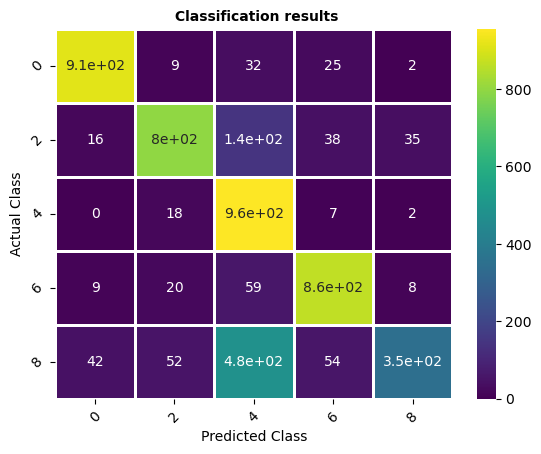

In [72]:

cm = confusion_matrix(even_y_test, preds)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels(np.unique(even_y_test));
ax.set_yticklabels(np.unique(even_y_test));
plt.xlabel('Predicted Class');
plt.ylabel('Actual Class');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results', fontsize='medium', fontweight='bold');
print(classification_report(even_y_test, model.predict(even_x_test)))

### 860 sixes were correctly classified